In [1]:
# Importing libraries
import pandas
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data= pandas.read_csv('D:\Files\Data Science\Anaconda\Sample csv files\Diabetes.csv')
# Data shuffling
data= data.sample(frac= 1)
# Shape of dataset
data.shape

(768, 9)

In [3]:
# Viewing our dataframe
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
540,8,100,74,40,215,39.4,0.661,43,Yes
659,3,80,82,31,70,34.2,1.292,27,Yes
678,3,121,52,0,0,36.0,0.127,25,Yes
5,5,116,74,0,0,25.6,0.201,30,No
711,5,126,78,27,22,29.6,0.439,40,No


In [4]:
# Names of columns in dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Checking null values in dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking duplicate values
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 540 to 761
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 60.0+ KB


In [8]:
x= data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= data[[ 'Outcome']]

In [9]:
# Logistic regression
lor= LogisticRegression()
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)
lor.fit(x_train, y_train)
y_pred= lor.predict(x_test)
accuracy_lor= (accuracy_score(y_pred, y_test)*100).round(decimals= 3)
print('Accuracy of Logistic regression = ', accuracy_lor , '% .')
print('Confusion Matrix of Logistic regression = ','\n', confusion_matrix(y_pred, y_test) )
print('Classification report of Logistic regression = ','\n', classification_report(y_pred, y_test) )

Accuracy of Logistic regression =  73.377 % .
Confusion Matrix of Logistic regression =  
 [[90 28]
 [13 23]]
Classification report of Logistic regression =  
               precision    recall  f1-score   support

          No       0.87      0.76      0.81       118
         Yes       0.45      0.64      0.53        36

    accuracy                           0.73       154
   macro avg       0.66      0.70      0.67       154
weighted avg       0.77      0.73      0.75       154



In [10]:
# Decision Tree Classifier
dtc= DecisionTreeClassifier(random_state= 1)
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
accuracy_dtc= (accuracy_score(y_pred, y_test)*100).round(decimals= 3)
print('Accuracy of Decision Tree Classifier = ', accuracy_dtc , '% .')
print('Confusion Matrix of Logistic regression = ','\n', confusion_matrix(y_pred, y_test) )
print('Classification report of Logistic regression = ','\n', classification_report(y_pred, y_test) )

Accuracy of Decision Tree Classifier =  70.779 % .
Confusion Matrix of Logistic regression =  
 [[79 21]
 [24 30]]
Classification report of Logistic regression =  
               precision    recall  f1-score   support

          No       0.77      0.79      0.78       100
         Yes       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



In [11]:
kfold= KFold(n_splits= 5, shuffle= True)
for train_set, test_set in kfold.split(x):
    print(train_set, '\n','\n', test_set)

[  0   1   2   3   4   6   7   8   9  10  11  12  14  16  18  19  20  22
  23  24  25  26  27  28  29  30  31  33  34  36  37  38  39  40  41  42
  43  44  45  47  49  51  52  53  54  55  56  57  58  59  60  61  63  65
  66  67  68  69  70  71  74  75  76  77  78  79  80  81  82  84  86  88
  90  91  92  93  95  96  97  98  99 100 101 102 103 104 106 107 108 109
 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129
 130 131 133 135 136 137 138 140 141 142 143 144 146 148 149 150 151 152
 153 154 155 156 157 158 159 161 162 163 165 166 167 169 170 171 172 173
 174 175 176 177 178 179 180 181 183 184 185 187 188 189 190 191 192 193
 194 195 196 197 199 202 204 205 207 208 210 211 212 213 215 216 218 219
 220 222 223 224 225 227 228 229 230 231 232 233 234 235 236 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 257 258 259 260 261
 262 263 264 265 266 268 269 270 272 273 274 275 276 277 278 279 280 281
 282 284 286 287 288 289 291 292 293 294 295 296 29

In [12]:
# AdaBoost Classifier :
kfold= model_selection.KFold(n_splits= 10, random_state= 7)
model= AdaBoostClassifier(n_estimators= 30, random_state= 7)
scores= model_selection.cross_val_score(model, x, y, cv= kfold)
print('Cross validation scores for AdaBoost Classifier : ', scores.round(decimals= 3))
scores_abc= (scores.mean()*100).round(decimals= 3)
print('Accuracy percentage of AdaBoost Classifier is : ', scores_abc , '% .')

Cross validation scores for AdaBoost Classifier :  [0.675 0.727 0.753 0.805 0.753 0.727 0.727 0.818 0.724 0.829]
Accuracy percentage of AdaBoost Classifier is :  75.396 % .


In [13]:
# XGB Classifier :
kfold= model_selection.KFold(n_splits= 10, random_state= 7)
model= XGBClassifier(n_estimators= 30, random_state= 7)
scores= model_selection.cross_val_score(model, x, y, cv= kfold)
print('Cross validation scores for XGB Classifier : ', scores.round(decimals= 3) )
scores_xgb= (scores.mean()*100).round(decimals= 3)
print('Accuracy percentage of XGB Classifier is : ', scores_xgb , '% .')

[11:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [14]:
# Random Forest Classifier :
rfc= RandomForestClassifier(n_estimators= 10)
scores= cross_val_score(rfc, x, y, scoring= 'accuracy', cv= 10)
print('Cross validation scores for Random Forest Classifier : ', scores.round(decimals= 3) )
scores_rfc= (scores.mean()*100).round(decimals= 3)
print('Accuracy percentage of Random Forest Classifier is : ', scores_rfc , '% .')

Cross validation scores for Random Forest Classifier :  [0.662 0.688 0.727 0.818 0.792 0.766 0.727 0.805 0.724 0.816]
Accuracy percentage of Random Forest Classifier is :  75.265 % .


In [15]:
# Comparing different classifiers :
import pandas
df= pandas.DataFrame( {'Classifier names':['Logistic regression', 'Decision Tree Classifier', 'Random Forest Classifier',
                                          'AdaBoost Classifier', 'XGB Classifier'], 'Accuracy scores': [accuracy_lor, accuracy_dtc, 
                                                                                                       scores_abc, scores_xgb, 
                                                                                                       scores_rfc] } )
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
from termcolor import colored
print(colored('Classifier names vs % Accuracy score table :', 'blue', attrs=['bold']))
df

Classifier names vs % Accuracy score table :


,Classifier names,Accuracy scores
0,Logistic regression,73.377
1,Decision Tree Classifier,70.779
2,Random Forest Classifier,75.396
3,AdaBoost Classifier,74.101
4,XGB Classifier,75.265


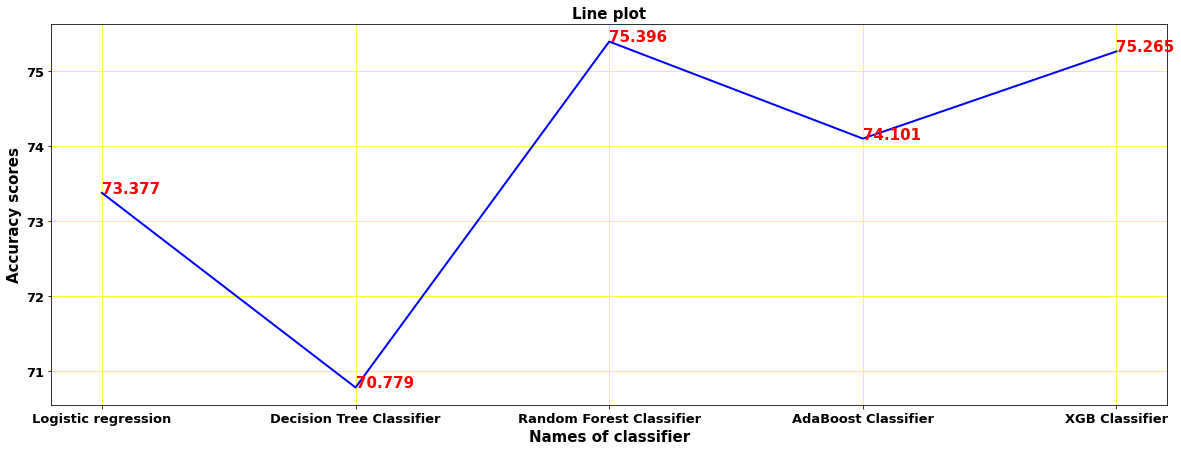

In [33]:
# Line plot
plt.figure(figsize= (20, 7))
plt.plot(df['Classifier names'], df['Accuracy scores'], linewidth= 2, color= 'blue')
plt.grid(color= 'yellow')
plt.title('Line plot', fontweight= 'bold', fontsize= 15)
plt.xlabel('Names of classifier', fontweight= 'bold', fontsize= 15)
plt.ylabel('Accuracy scores', fontweight= 'bold', fontsize= 15)
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
for x,y in zip(df['Classifier names'], df['Accuracy scores']): 
    plt.text(x, y, str(y), fontweight= 'bold', fontsize= 15, color= 'red')
plt.show()

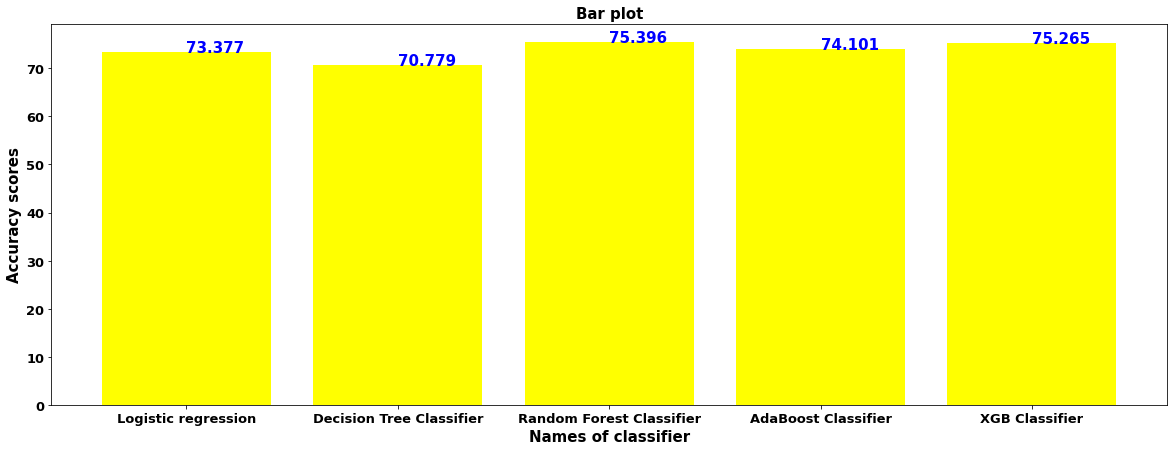

In [34]:
# Bar plot
plt.figure(figsize= (20, 7))
plt.bar(df['Classifier names'], df['Accuracy scores'], linewidth= 2, color= 'yellow')
plt.title('Bar plot', fontweight= 'bold', fontsize= 15)
plt.xlabel('Names of classifier', fontweight= 'bold', fontsize= 15)
plt.ylabel('Accuracy scores', fontweight= 'bold', fontsize= 15)
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
for x,y in zip(df['Classifier names'], df['Accuracy scores']): 
    plt.text(x, y, str(y), fontweight= 'bold', fontsize= 15, color= 'blue')
plt.show()

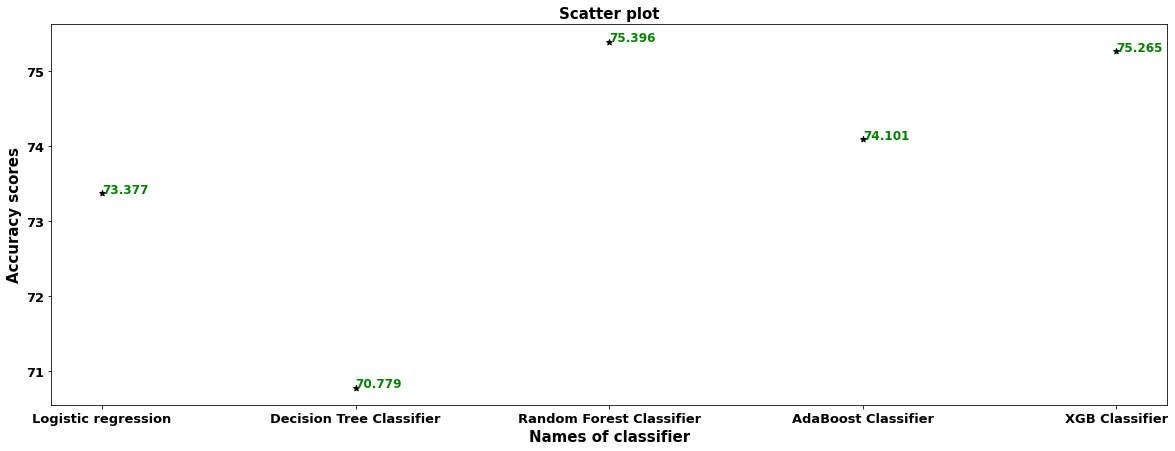

In [35]:
# Scatter plot
plt.figure(figsize= (20, 7))
plt.scatter(df['Classifier names'], df['Accuracy scores'], marker= '*', color= 'black')
plt.title('Scatter plot', fontweight= 'bold', fontsize= 15)
plt.xlabel('Names of classifier', fontweight= 'bold', fontsize= 15)
plt.ylabel('Accuracy scores', fontweight= 'bold', fontsize= 15)
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
for x,y in zip(df['Classifier names'], df['Accuracy scores']): 
    plt.text(x, y, str(y), fontweight= 'bold', fontsize= 12, color= 'green')
plt.show()